In [1]:
import numpy as np

### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найдите собственные значения и собственные вектора матриц:

~~~

m = np.array([[2, 2],
              [1, 3]])
print(m)

~~~


In [45]:
#Диагональная, ортогональная, но не единичная матрица
A = np.array([[-1, 0, 0],[0, -1, 0], [0, 0, -1]])
print(A)
print()
print('Проверка A.T @ A')
print(A.T @ A)

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]

Проверка A.T @ A
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [50]:
#Верхнетреугольная ортогональная матрица
A = np.array([[1, 0, 0],[0, 1, 0], [0, 0, 1]])
print(A)
print()
print('Проверка A.T @ A')
print(A.T @ A)

[[1 0 0]
 [0 1 0]
 [0 0 1]]

Проверка A.T @ A
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [51]:
#Нижнетреугольная ортогональная матрица
A = np.array([[1, 0, 0],[0, 1, 0], [0, 0, 1]])
print(A)
print()
print('Проверка A.T @ A')
print(A.T @ A)

[[1 0 0]
 [0 1 0]
 [0 0 1]]

Проверка A.T @ A
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [56]:
#Определитель = 1, элементы != 0
A = np.array([[1, 1, 1],[1, 2, 1], [1, 1, 2]])
print(A)
print()
print(f'Определитель = {np.linalg.det(A)}')

[[1 1 1]
 [1 2 1]
 [1 1 2]]

Определитель = 1.0


In [61]:
m = np.array([[2, 2],
              [1, 3]])
w, v = np.linalg.eig(m)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

#Собственные вектора в данном случае удобней записать как: (2; -1) и (1; 1)

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


### Уровень 1:

Найдите спектральное разложение матрицы:

~~~
m = np.array([[1, 2],
              [2,3]])
print(m)
~~~

In [62]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [64]:
a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [66]:
np.diag(a)

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [65]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

In [81]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt 

<Figure size 432x288 with 0 Axes>

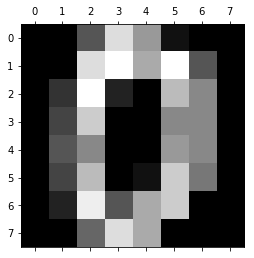

In [134]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

<Figure size 432x288 with 0 Axes>

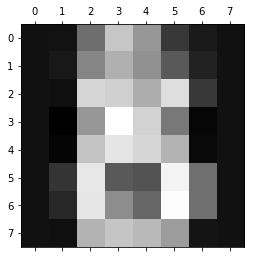

In [164]:
pca = PCA(n_components=3)
pca.fit(digits.images[0])
X_transformed = pca.transform(X)

# plt.gray() 
# plt.matshow(X_transformed) 
# plt.show()

X_recovered = pca.inverse_transform(X_transformed)

plt.gray() 
plt.matshow(X_recovered) 
plt.show()

In [105]:
digits.target[0]

0

In [104]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [136]:
for i in range(1,digits.images[0].shape[1]+1):
    MSE = 0
    for X in digits.images:
        pca = PCA(n_components=i)
        pca.fit(X)
        X_transformed = pca.transform(X)
        X_recovered = pca.inverse_transform(X_transformed)
        MSE += mean_squared_error(X, X_recovered)
    print(f'n_components= {i}, MSE = {MSE/digits.images.shape[0]}')

n_components= 1, MSE = 6.54317890972173
n_components= 2, MSE = 2.471297954151433
n_components= 3, MSE = 0.7630355638786269
n_components= 4, MSE = 0.16645967142093132
n_components= 5, MSE = 0.020534855411458646
n_components= 6, MSE = 0.00015156015297230273
n_components= 7, MSE = 9.46914301710209e-30
n_components= 8, MSE = 9.469513781391015e-30


**Выводы**: 
- Можно сжать размерность массива до 7 без потери данных.
- При сжатии до размерностей 5-6 потеря данных незначительна. 
- При сжатии до размерностей 3-4 потеря данных существена. 
- При сжатии до размерностей 1-2 данные теряются почти полностью.

In [135]:
digits.images[0].shape

(8, 8)